In [5]:
import pandas as pd
import numpy as np

#### Take a Quick Look at the Data Structure

In [6]:
housing = pd.read_csv("P3.csv")
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


#### Notice that the total_bedrooms attribute has only 20,433 nonnull values, meaning that 207 districts are missing this feature. We will need to take care of this later.

#### All attributes are numerical, except the ocean_proximity field.

In [8]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

#### The describe() method shows a summary of the numerical attributes

In [10]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#### The count , mean , min , and max rows are self-explanatory. Note that the null values are ignored (so, for example, the count of total_bedrooms is 20,433, not 20,640). The std row shows the standard deviation, which measures how dispersed the values are. 12 The 25%, 50%, and 75% rows show the corresponding percentiles: a percentile indicates the value below which a given percentage of observations in a group of observations fall. For example, 25% of the districts have a housing_median_age lower than 18, while 50% are lower than 29 and 75% are lower than 37. These are often called the 25th percentile (or first quartile), the median, and the 75th percentile (or third quartile).

#### Data Visualization

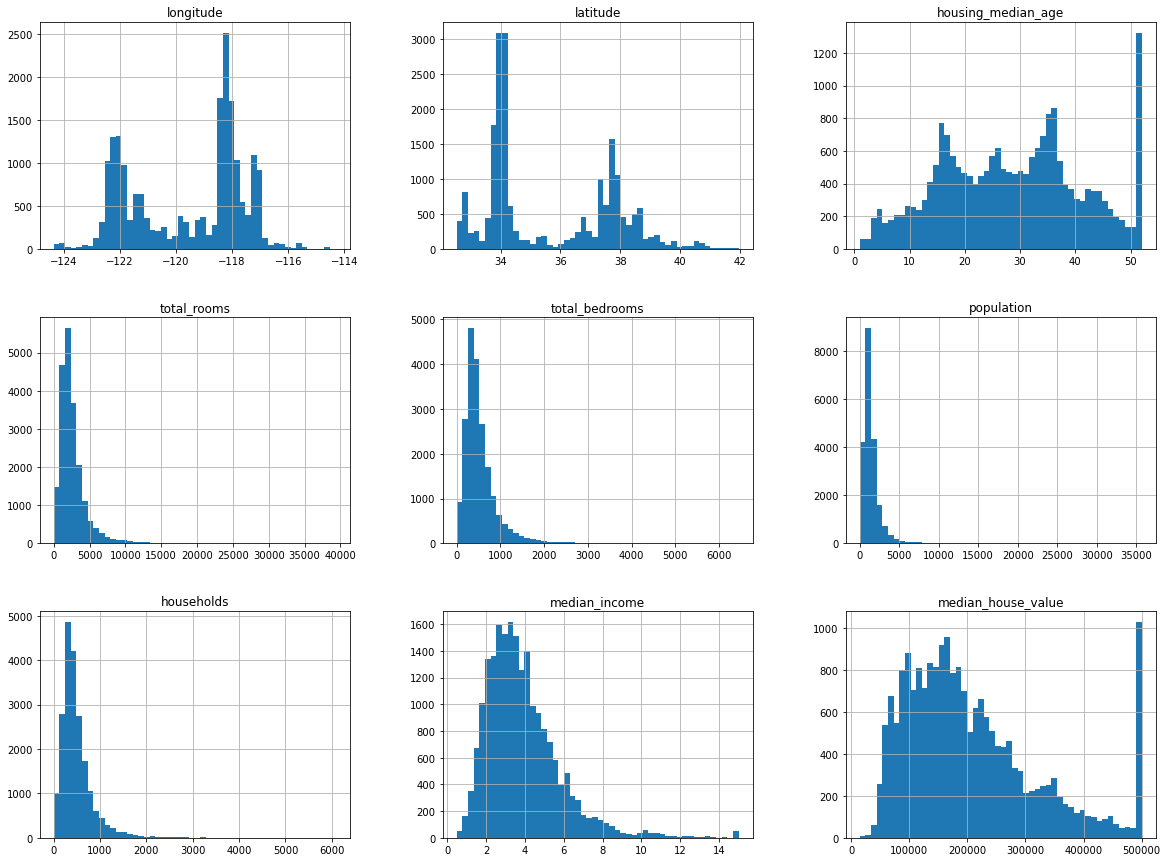

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(20,15))
plt.show()

#### The housing median age and the median house are capped. The latter may be a serious problem since it is your target attribute. Your Machine Learning algorithms may learn that prices never go beyond that limit.

#### Check normality test

In [13]:
from scipy import stats

housing.select_dtypes([float, int]).apply(stats.normaltest).rename(index={0: "test", 1: "p_value"})

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
test,420320.722187,10227.275141,1770.127173,18461.958386,NaN,21882.808473,15709.280182,7083.20377,2430.931051
p_value,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.00000,0.000000


#### All distributions are normal

In [14]:
from sklearn.model_selection import train_test_split

X = housing.drop(columns="median_house_value")
y = housing["median_house_value"]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

#### The following code uses the pd.cut() function to create an income category attribute with five categories (labeled from 1 to 5): category 1 ranges from 0 to 1.5 (i.e., less than $15,000), category 2 from 1.5 to 3, and so on

In [15]:
housing["income_cat"] = pd.cut(housing["median_income"],
                        bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                        labels=[1, 2, 3, 4, 5])

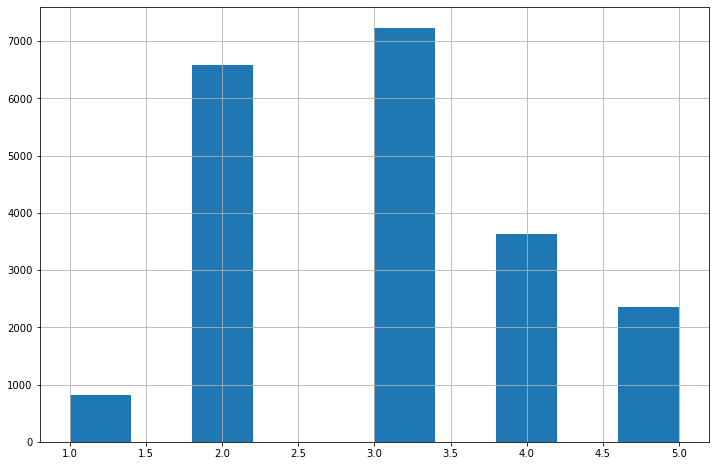

In [17]:
plt.rcParams["figure.figsize"]=(12,8)
housing["income_cat"].hist()
plt.show()

#### Now we are ready to do stratified sampling based on the income category. For this you can use Scikit-Learn’s StratifiedShuffleSplit.

In [18]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

#### Let’s see if this worked as expected. You can start by looking at the income category proportions in the test set

In [19]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

#### Now we should remove the income_cat attribute so the data is back to its original state:

In [20]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

#### We spent quite a bit of time on test set generation for a good reason: this is an often neglected but critical part of a Machine Learning project. Moreover, many of these ideas will be useful later when we discuss cross-validation.

#### Now, let’s create a copy the data so that we can play with it without harming the training set

In [21]:
housing = strat_train_set.copy()

### Discover and Visualize the Data to Gain Insights

#### Visualizing Geographical Data

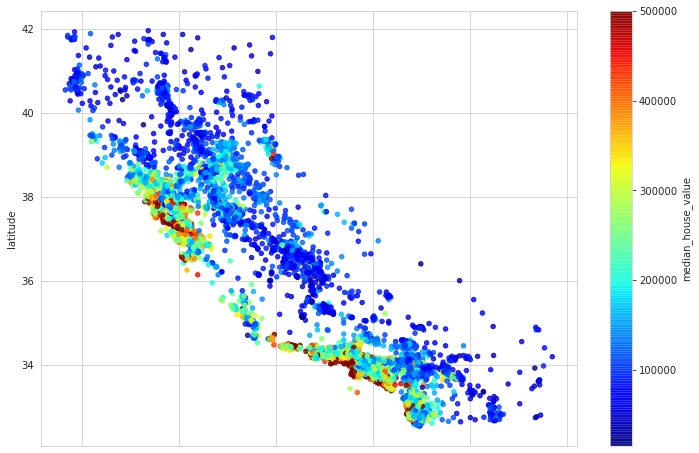

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.8, figsize=(12,8),
           c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.show()

#### This image tells you that the housing prices are very much related to th location (e.g., close to the ocean)

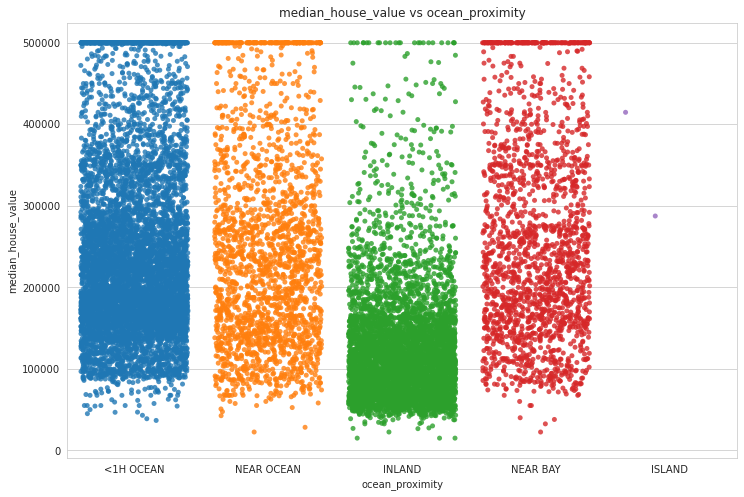

In [23]:
plt.rcParams["figure.figsize"]=(12,8)
sns.set_style("whitegrid")
plt.title("median_house_value vs ocean_proximity")
sns.stripplot(data=housing,x="ocean_proximity",y="median_house_value",jitter=0.4, alpha=0.8)
plt.show()

#### From the above plot, we can see the more expensive houses available in "<1H OCEAN" class and "ISLAND" have very less number of houses

#### Looking for Correlations with the median house

In [24]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False).to_frame()

,median_house_value
median_house_value,1.000000
median_income,0.687160
total_rooms,0.135097
housing_median_age,0.114110
households,0.064506
total_bedrooms,0.047689
population,-0.026920
longitude,-0.047432
latitude,-0.142724


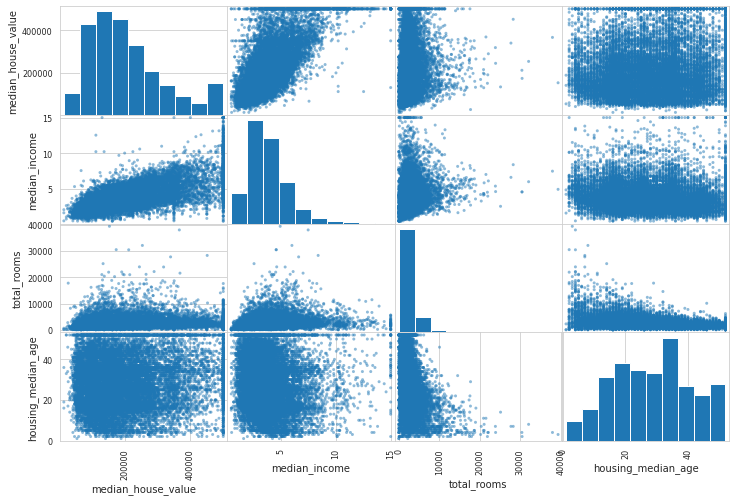

In [27]:
from pandas.plotting import scatter_matrix

plt.rcParams["figure.figsize"]=(12,8)
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

#### The most promising attribute to predict the median house value is the median income, so let’s zoom in on their correlation scatterplot

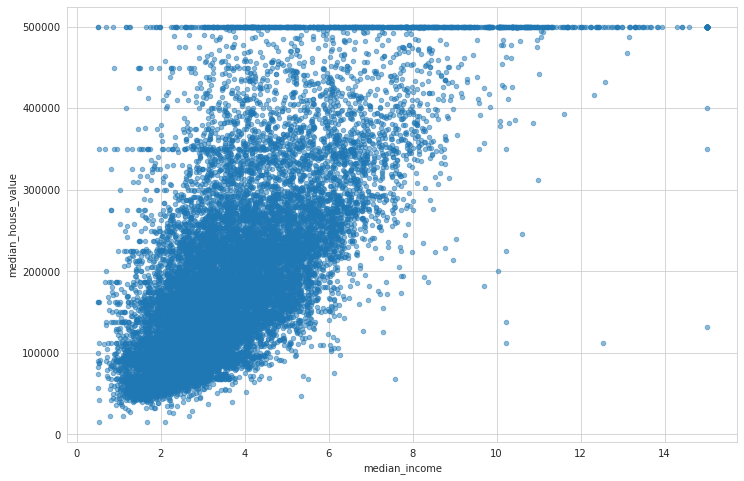

In [28]:
plt.rcParams["figure.figsize"]=(12,8)
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.5)
plt.show()

#### This plot reveals a few things. First, the correlation is indeed very strong; you can clearly see the upward trend, and the points are not too dispersed. Second, the price cap that we noticed earlier is clearly visible as a horizontal line at 500,000. But this plot reveals other less obvious straight lines: a horizontal line around 450,000, another around 350,000, perhaps one around 280,000, and a few more below that. You may want to try removing the corresponding districts to prevent your algorithms from learning to reproduce these data quirks.

#### Data cleaning

#### Now, check the percentage of missing values in each column.

In [32]:
numerical_with_nan=[feature for feature in housing.columns if housing[feature].isnull().sum()>1]
for feature in numerical_with_nan:
    print(f"{feature}: {round(housing[feature].isnull().mean()*100, 3)}% missing value")

total_bedrooms: 0.957% missing value


#### Since, our data has so small amount of missing values, I have decided to drop rows where values are missing.

#### Prepare the Data for Machine Learning Algorithms

In [ ]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()
housing = housing.dropna().reset_index(drop=True)

In [48]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [52]:
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)
housing_num.median().values
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

#### Handling Categorical Attributes

In [34]:
housing_cat = housing[["ocean_proximity"]]

from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
house_cat_encod = ordinal_encoder.fit_transform(housing_cat)
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [35]:
house_cat_encod

array([[0.],
       [0.],
       [4.],
       ...,
       [1.],
       [0.],
       [3.]])

#### I have decided to use one-hot encoding, because, for example, categories 0 and 4 are clearly more similar than categories 0 and 1, only one attribute will be equal to 1, while the others will be 0. The new attributes are sometimes called dummy attributes. Scikit-Learn provides a OneHotEncoder class to convert categorical values into one-hot vectors.

In [36]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

#### Custom Transformers

In [54]:
from sklearn.base import BaseEstimator, TransformerMixin
    
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

#### Feature Scaling

#### Transformation Pipelines

In [55]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
                        ('imputer', SimpleImputer(strategy="median")),
                        ('attribs_adder', CombinedAttributesAdder()),
                        ('std_scaler', StandardScaler()),
                        ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [56]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

### Select and Train a Model

#### Let’s train a DecisionTreeRegressor

In [57]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

#### Now that the model is trained, let’s evaluate it.

In [59]:
from sklearn.metrics import mean_squared_error

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

#### Wait, what!? No error at all? Could this model really be absolutely perfect? Of course, it is much more likely that the model has badly overfit the data. How can you be sure? As we saw earlier, you don’t want to touch the test set until you are ready to launch a model you are confident about, so you need to use part of the training set for training and part of it for model validation.

### Better Evaluation Using Cross-Validation

In [62]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
scoring= "neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

#### Let’s look at the results

In [64]:
def display_scores(scores):

    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [68218.15686862 67682.38788509 69295.10721534 67959.10567312
 70320.3837886  76438.04833245 70865.70524542 70350.19022271
 76491.85780936 69248.73269199]
Mean: 70686.96757326966
Standard deviation: 3059.754583885558


#### Now the Decision Tree doesn’t look as good as it did earlier.

#### Let’s try now: the RandomForestRegressor

In [70]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

housing_predictions = forest_reg.predict(housing_prepared)
rand_tree_mse = mean_squared_error(housing_labels, housing_predictions)
rand_tree_mse = np.sqrt(rand_tree_mse)

In [71]:
display_scores(rand_tree_mse)

Scores: 18703.21908154988
Mean: 18703.21908154988
Standard deviation: 0.0


#### Wow, this is much better: Random Forests look very promising

### Grid Search

In [72]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
    ]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
scoring= "neg_mean_squared_error",
return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [73]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [74]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64331.67887980892 {'max_features': 2, 'n_estimators': 3}
55414.316647829575 {'max_features': 2, 'n_estimators': 10}
52666.681634754284 {'max_features': 2, 'n_estimators': 30}
60468.05716108888 {'max_features': 4, 'n_estimators': 3}
52119.09843393514 {'max_features': 4, 'n_estimators': 10}
50917.63539244413 {'max_features': 4, 'n_estimators': 30}
58440.38779710918 {'max_features': 6, 'n_estimators': 3}
51710.6970444773 {'max_features': 6, 'n_estimators': 10}
49685.93621281804 {'max_features': 6, 'n_estimators': 30}
58674.90020258726 {'max_features': 8, 'n_estimators': 3}
51912.84469663328 {'max_features': 8, 'n_estimators': 10}
50097.874744722205 {'max_features': 8, 'n_estimators': 30}
63296.3948177351 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54282.94673420846 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59354.123457614296 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52812.84356628863 {'bootstrap': False, 'max_features': 3, 'n_estimators': 

#### RandomForestRegressor can indicate the relative importance of each attribute for making accurate predictions

In [76]:
feature_importances = grid_search.best_estimator_.feature_importances_

#### Let’s display these importance scores next to their corresponding attribute names

In [77]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.347457012711489, 'median_income'),
 (0.15426160300643968, 'INLAND'),
 (0.10388283306168677, 'pop_per_hhold'),
 (0.07699939665090322, 'longitude'),
 (0.0707726050854443, 'latitude'),
 (0.06533310214885178, 'rooms_per_hhold'),
 (0.049750828255283236, 'bedrooms_per_room'),
 (0.044731325253638696, 'housing_median_age'),
 (0.01816651607025521, 'population'),
 (0.017794066369815006, 'total_rooms'),
 (0.016991722114791337, 'households'),
 (0.016885260397260096, 'total_bedrooms'),
 (0.011510152059107787, '<1H OCEAN'),
 (0.0030880917067598415, 'NEAR OCEAN'),
 (0.0022678962063864385, 'NEAR BAY'),
 (0.00010758890188761015, 'ISLAND')]

#### Evaluate Your System on the Test Set

In [79]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

47804.67368730536

#### To know how accurate  this estimate is. You can compute a 95% confidence interval for the generalization error using scipy.stats.t.interval.

In [80]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,

loc = squared_errors.mean(),
scale = stats.sem(squared_errors)))

array([45836.62040041, 49694.84765011])

#### The model predict witch good precision, which fits in confidence interval